## Zonal Costs

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp

from datetime import datetime
from pytz import timezone
import os

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format


Bad key legend.labelcolor in file style.txt, line 43 ('legend.labelcolor: black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


### Scenarios

In [2]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                 's15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25']
savefig = False
folder_to_save_results="results_v2/"

figure_names={'s1':1,'s2':2,'s3':3,'s4':4,'s5':5,'s6':6,'s7':7,'s8':8,'s9':9,'s10':10,'s11':11,'s12':12,'s13':13,
              's14':14,'s15':15,'s16':16,'s17':17,'s18':18,'s19':19,'s20':20,'s21':21,'s22':22,'s23':23,'s24':24,
              's25':25}

#Check if the directory exists. If not, then create the directory.
if not os.path.exists(folder_to_save_results):
    os.makedirs(folder_to_save_results)



In [3]:
#zones_under_analysis
analysis_zones=['WA_SEATAC','WA_W','OR_W','CA_PGE_N','CA_PGE_BAY','CA_PGE_CEN',
                'CA_PGE_S','CA_SCE_CEN','CA_LADWP','CA_SCE_S','CA_SDGE','MEX_BAJA'] #these are coastal load zones
analysis_period=[2020,2030,2040,2050]

### Generation Fixed Costs

In [4]:
fname = "gen_cap.csv"

gen_cap = get_data_sftp(hostname, username, scenario_name, fname)
gen_cap = gen_cap[['GENERATION_PROJECT', 'PERIOD', 'gen_load_zone', 'gen_tech', 'GenCapitalCosts', 'GenFixedOMCosts', 'scenario']]
gen_cap  = gen_cap  .replace({"scenario": figure_names})
gen_cap['GenFixedCosts'] = gen_cap['GenCapitalCosts'] + gen_cap['GenFixedOMCosts'] 
gen_cap= gen_cap.loc[(gen_cap.gen_load_zone.isin(analysis_zones)) & (gen_cap.PERIOD.isin(analysis_period))]
gen_cap

,GENERATION_PROJECT,PERIOD,gen_load_zone,gen_tech,GenCapitalCosts,GenFixedOMCosts,scenario,GenFixedCosts
0,77333,2020,CA_SCE_CEN,Wind,0.00,0.00,1,0.00
1,77333,2030,CA_SCE_CEN,Wind,0.00,0.00,1,0.00
2,77333,2040,CA_SCE_CEN,Wind,"4,168,400.00","1,543,000.00",1,"5,711,400.00"
3,77333,2050,CA_SCE_CEN,Wind,"4,168,400.00","1,543,000.00",1,"5,711,400.00"
4,77334,2020,CA_SCE_CEN,Wind,0.00,0.00,1,0.00
...,...,...,...,...,...,...,...,...
36441,1400000200,2050,CA_SDGE,Offshore_Wind,0.00,0.00,25,0.00
36442,1400000201,2020,CA_PGE_S,Offshore_Wind,0.00,0.00,25,0.00
36443,1400000201,2030,CA_PGE_S,Offshore_Wind,0.00,0.00,25,0.00
36444,1400000201,2040,CA_PGE_S,Offshore_Wind,0.00,0.00,25,0.00


In [8]:
storage_costs=gen_cap.copy()
storage_costs=storage_costs.loc[storage_costs.gen_tech.isin(['Battery_Storage'])]
storage_costs

year_storage_costs_by_scenario= storage_costs.pivot_table(
    index="scenario", values="GenFixedCosts", aggfunc=np.sum )
year_storage_costs_by_scenario.rename(columns={'GenFixedCosts':'StorageFixedCosts'}, inplace=True)

#year_storage_costs_by_scenario['sc_order'] = year_storage_costs_by_scenario.index.map(order)
#year_storage_costs_by_scenario=year_storage_costs_by_scenario.sort_values('sc_order').drop('sc_order',axis=1)
year_storage_costs_by_scenario


,StorageFixedCosts
scenario,
1,"4,819,381,600.00"
2,"4,686,278,800.00"
3,"4,679,489,500.00"
4,"4,524,073,000.00"
5,"4,467,784,100.00"
6,"4,800,154,430.00"
7,"4,664,227,400.00"
8,"4,648,764,300.00"
9,"4,485,559,400.00"


In [7]:
year_genfixed_costs_by_scenario= gen_cap.pivot_table(
    index="scenario", values="GenFixedCosts", aggfunc=np.sum )

#sort according to order dictionary (defined above)
#year_genfixed_costs_by_scenario['sc_order'] = year_genfixed_costs_by_scenario.index.map(order)
#year_genfixed_costs_by_scenario=year_genfixed_costs_by_scenario.sort_values('sc_order').drop('sc_order',axis=1)

year_genfixed_costs_by_scenario['GenFixedCosts']=year_genfixed_costs_by_scenario['GenFixedCosts']-year_storage_costs_by_scenario['StorageFixedCosts']

year_genfixed_costs_by_scenario

,GenFixedCosts
scenario,
1,"33,065,477,211.00"
2,"33,649,490,807.00"
3,"34,288,101,944.00"
4,"35,261,946,038.00"
5,"35,072,356,868.00"
6,"33,394,926,851.00"
7,"34,030,210,781.00"
8,"34,661,542,501.00"
9,"35,562,453,951.00"


In [10]:
fname = "storage_builds.csv"
storage_builds = get_data_sftp(hostname, username, scenario_name, fname)

storage_builds=storage_builds.replace({"scenario": figure_names})

fname = "gen_build_costs.csv"
gen_build_costs = get_data_sftp(hostname, username, scenario_name, fname, fpath='inputs')
gen_build_costs = gen_build_costs.rename(columns={'GENERATION_PROJECT': 'generation_project'})
gen_build_costs=gen_build_costs.replace({"scenario": figure_names})
gen_build_costs   = gen_build_costs.replace({"gen_storage_energy_overnight_cost": {'.':0}})
gen_build_costs['gen_storage_energy_overnight_cost']=gen_build_costs.gen_storage_energy_overnight_cost.replace('.',0).astype(float)

builds_costs=pd.merge(left=storage_builds,right=gen_build_costs , on=['generation_project', 'build_year','scenario'])
builds_costs= builds_costs.loc[builds_costs.load_zone.isin(analysis_zones)]
builds_costs['EnergyStorageFixedCosts']=builds_costs['IncrementalEnergyCapacityMWh']*builds_costs['gen_storage_energy_overnight_cost']
#builds_costs
year_energystoragefixedcosts_by_scenario= builds_costs.pivot_table(
    index="scenario", values="EnergyStorageFixedCosts", aggfunc=np.sum )

#year_energystoragefixedcosts_by_scenario['sc_order'] = year_energystoragefixedcosts_by_scenario.index.map(order)
#year_energystoragefixedcosts_by_scenario=year_energystoragefixedcosts_by_scenario.sort_values('sc_order').drop('sc_order',axis=1)

year_energystoragefixedcosts_by_scenario    

,EnergyStorageFixedCosts
scenario,
1,"90,992,223,416.90"
2,"88,459,763,541.28"
3,"88,324,610,963.65"
4,"85,404,435,895.75"
5,"84,334,011,712.61"
6,"90,624,724,687.02"
7,"88,028,154,364.39"
8,"87,734,495,155.77"
9,"84,659,285,972.91"


### Generation Variable Costs

In [20]:
# Name of output/input file to read
fname = "dispatch.csv"

dispatch = get_data_sftp(hostname, username, scenario_name, fname)
dispatch = dispatch[['generation_project', 'timestamp', 'gen_load_zone', 'period','VariableOMCost_per_yr', 'tech_map', 'scenario']]
dispatch  = dispatch  .replace({"scenario": figure_names})
dispatch = dispatch.loc[(dispatch.gen_load_zone.isin(analysis_zones)) & (dispatch.period.isin(analysis_period))]
dispatch.rename(columns={'VariableOMCost_per_yr': 'GenVariableOMCosts'}, inplace=True)
dispatch

/Users/nataliagonzalez/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


: 

: 

In [9]:
year_varom_cost_by_scenario= dispatch.pivot_table(
    index="scenario", values="GenVariableOMCosts", aggfunc=np.sum )


#sort according to order dictionary (defined above)
#year_varom_cost_by_scenario['sc_order'] = year_varom_cost_by_scenario.index.map(order)
#year_varom_cost_by_scenario=year_varom_cost_by_scenario.sort_values('sc_order').drop('sc_order',axis=1)

year_varom_cost_by_scenario

,GenVariableOMCosts
scenario,
WECC-connected,"2,557,521.86"
Islanded,"2,557,510.41"
LDES 90,"1,327,274.40"
LDES 27.5,"1,327,307.80"
WS 0.1,"1,327,302.90"
WS 0.2,"1,327,276.76"
WS 0.3,"1,327,303.20"
XR 0.95,"1,327,282.71"
XR 1.0,"1,327,282.71"


### Transmission Fixed Costs

In [10]:
fname = "transmission.csv"

transmission = get_data_sftp(hostname, username, scenario_name, fname)
transmission = transmission[['PERIOD', 'trans_lz1', 'trans_lz2','TotalAnnualCost', 'scenario']]
transmission  = transmission  .replace({"scenario": figure_names})
transmission  = transmission .loc[((transmission.trans_lz1.isin(analysis_zones)) ^ (transmission.trans_lz2.isin(analysis_zones))) & (transmission.PERIOD.isin(analysis_period))]
transmission ['TotalAnnualCost'] = transmission ['TotalAnnualCost']
transmission.rename(columns={'TotalAnnualCost': 'TxFixedCosts'}, inplace=True)
transmission

,PERIOD,trans_lz1,trans_lz2,TxFixedCosts,scenario
20,2035,AZ_NM_N,NM_N,0.00,WECC-connected
70,2035,CO_E,NM_N,0.00,WECC-connected
77,2035,CO_SW,NM_N,0.00,WECC-connected
99,2035,NM_N,NM_S_TX_EPE,0.00,WECC-connected
20,2035,AZ_NM_N,NM_N,0.00,Islanded
70,2035,CO_E,NM_N,0.00,Islanded
77,2035,CO_SW,NM_N,0.00,Islanded
99,2035,NM_N,NM_S_TX_EPE,0.00,Islanded
20,2035,AZ_NM_N,NM_N,0.00,LDES 90
70,2035,CO_E,NM_N,0.00,LDES 90


In [11]:
year_tx_cost_by_scenario= transmission.pivot_table(
    index="scenario", values="TxFixedCosts", aggfunc=np.sum )


#sort according to order dictionary (defined above)
# year_tx_cost_by_scenario['sc_order'] = year_tx_cost_by_scenario.index.map(order)
# year_tx_cost_by_scenario=year_tx_cost_by_scenario.sort_values('sc_order').drop('sc_order',axis=1)

year_tx_cost_by_scenario

,TxFixedCosts
scenario,
WECC-connected,0.00
Islanded,0.00
LDES 90,0.00
LDES 27.5,0.00
WS 0.1,0.00
WS 0.2,0.00
WS 0.3,0.00
XR 0.95,0.00
XR 1.0,0.00


### Energy flows

In [12]:
#Load transmission lines 
fname="transmission_lines.csv"
txs = get_data_sftp(hostname, username, scenario_name, fname)
txs  = txs .replace({"scenario": figure_names})
#Get the transmission lines that have NM as sending zone or receiving zone
txs = txs[['trans_lz1', 'trans_lz2', 'scenario']]
txs = txs.loc[((txs.trans_lz1.isin(analysis_zones)) ^ (txs.trans_lz2.isin(analysis_zones)))]
#Duplicate the table to have NM in the sending zone and receiving zone
txs_copy=txs.copy()
txs_copy.rename(columns={'trans_lz1':'trans_lz2', 'trans_lz2':'trans_lz1'}, inplace=True)
txs=pd.concat([txs,txs_copy ])
txs.reset_index(inplace=True, drop=True)
txs.rename(columns={'trans_lz1': 'load_zone_from', 'trans_lz2': 'load_zone_to'}, inplace=True)

txs

,load_zone_from,load_zone_to,scenario
0,AZ_NM_N,NM_N,WECC-connected
1,CO_E,NM_N,WECC-connected
2,CO_SW,NM_N,WECC-connected
3,NM_N,NM_S_TX_EPE,WECC-connected
4,AZ_NM_N,NM_N,Islanded
...,...,...,...
75,NM_S_TX_EPE,NM_N,XR 1.0
76,NM_N,AZ_NM_N,XR 1.2
77,NM_N,CO_E,XR 1.2
78,NM_N,CO_SW,XR 1.2


In [13]:
#Load the dispatch (MW)
fname="transmission_dispatch.csv"
tx_dispatch = get_data_sftp(hostname, username, scenario_name, fname)
tx_dispatch  = tx_dispatch .replace({"scenario": figure_names})
tx_dispatch.drop(['transmission_limit_dual', 'dispatch_limit'], axis=1, inplace=True)
tx_dispatch

exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column


,load_zone_from,load_zone_to,timestamp,transmission_dispatch,scenario
0,AZ_APS_E,AZ_APS_N,2035010200,165.79,WECC-connected
1,AZ_APS_E,AZ_APS_N,2035010204,0.00,WECC-connected
2,AZ_APS_E,AZ_APS_N,2035010208,0.00,WECC-connected
3,AZ_APS_E,AZ_APS_N,2035010212,0.00,WECC-connected
4,AZ_APS_E,AZ_APS_N,2035010216,0.00,WECC-connected
...,...,...,...,...,...
550363,WY_SW,WY_SE,2035123104,0.00,XR 1.2
550364,WY_SW,WY_SE,2035123108,0.00,XR 1.2
550365,WY_SW,WY_SE,2035123112,0.00,XR 1.2
550366,WY_SW,WY_SE,2035123116,0.00,XR 1.2


In [14]:
#Load the Locational Marginal Price

fname = "load_balance.csv"
lmp = get_data_sftp(hostname, username, scenario_name, fname)
lmp   = lmp.replace({"scenario": figure_names})
lmp=lmp.reset_index(drop=True)
lmp.drop(["StorageNetCharge", "TXPowerNet", "ZoneTotalCentralDispatch","zone_demand_mw"], axis=1, inplace=True)
lmp=lmp.rename(columns={'normalized_energy_balance_duals_dollar_per_mwh':'LMP'})
lmp['load_zone_to']=lmp['load_zone']
lmp.rename(columns={'load_zone':'load_zone_from'}, inplace=True)

#Create two tables (the LMP of the receiving zone and the LMP of the sending zone)
lmp_lz_from=lmp.copy()
lmp_lz_from.drop(['load_zone_to'], axis=1, inplace=True)
lmp_lz_from.rename(columns={'LMP':'zone_from_LMP'}, inplace=True)

lmp_lz_to=lmp.copy()
lmp_lz_to.drop(['load_zone_from'], axis=1, inplace=True)
lmp_lz_to.rename(columns={'LMP':'zone_to_LMP'}, inplace=True)

exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column
exception
timestamp in column


In [15]:
#Get the power flow through any transmission that has NM_N as sending or receiving zone
tx_flow=pd.merge(txs, tx_dispatch, how='inner', on=['load_zone_from', 'load_zone_to', 'scenario'])
#Paste the LMP of the sending zone
tx_flow=pd.merge(tx_flow, lmp_lz_from, how='inner', on=['load_zone_from', 'timestamp' ,'scenario'])
#Paste the LMP of the receiving zone
tx_flow=pd.merge(tx_flow, lmp_lz_to, how='inner', on=['load_zone_to', 'timestamp' ,'scenario'])
#Create the sale column. It is 1 if the load zone from is NM_N
tx_flow['sale']=np.where(tx_flow['load_zone_from'] == 'NM_N', 1, 0)
#Create the purchase column. It is 1 if the load zone to is NM_N
tx_flow['purchase']=np.where(tx_flow['load_zone_to'] == 'NM_N', 1, 0)

#Compute the sale in MWh
tx_flow['sale']=tx_flow['sale']*tx_flow['transmission_dispatch']

#Compute the purchase in MWh
tx_flow['purchase']=tx_flow['purchase']*tx_flow['transmission_dispatch']

#Compute the sale in USD
tx_flow['sale']=tx_flow['sale']*tx_flow['transmission_dispatch']*(tx_flow['zone_from_LMP'])

#Compute the purchase in USD
tx_flow['purchase']=tx_flow['purchase']*tx_flow['transmission_dispatch']*(tx_flow['zone_from_LMP'])

tx_flow['net revenue']=tx_flow['sale'] - tx_flow['purchase']

In [16]:
tx_flow

,load_zone_from,load_zone_to,scenario,timestamp,transmission_dispatch,zone_from_LMP,zone_to_LMP,sale,purchase,net revenue
0,AZ_NM_N,NM_N,WECC-connected,2035010200,0.00,0.00,0.00,0.00,0.00,0.00
1,CO_E,NM_N,WECC-connected,2035010200,0.00,0.00,0.00,0.00,0.00,0.00
2,CO_SW,NM_N,WECC-connected,2035010200,0.00,0.00,0.00,0.00,0.00,0.00
3,NM_S_TX_EPE,NM_N,WECC-connected,2035010200,0.00,0.00,0.00,0.00,0.00,0.00
4,AZ_NM_N,NM_N,WECC-connected,2035010204,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
174715,NM_N,CO_SW,XR 1.2,2035123116,0.00,0.00,0.00,0.00,0.00,0.00
174716,NM_N,NM_S_TX_EPE,XR 1.2,2035123120,72.75,0.00,0.00,0.00,0.00,0.00
174717,NM_N,AZ_NM_N,XR 1.2,2035123120,829.55,0.00,0.00,0.00,0.00,0.00
174718,NM_N,CO_E,XR 1.2,2035123120,175.72,0.00,0.00,0.00,0.00,0.00


In [17]:
tx_flow.to_csv('test.csv')

In [18]:
revenue_from_energy_exchanges = tx_flow.pivot_table(
    index='scenario',
    values=["sale", "purchase", "net revenue"],
    aggfunc=np.sum)

revenue_from_energy_exchanges 

,net revenue,purchase,sale
scenario,,,
Islanded,0.00,0.00,0.00
LDES 27.5,"-125,327,463,534.84","137,858,242,361.22","12,530,778,826.38"
LDES 90,"-115,067,490,746.74","131,497,150,546.83","16,429,659,800.09"
WECC-connected,"-10,356,254,767.07","89,218,009,294.89","78,861,754,527.81"
WS 0.1,"102,838,060,716.61","13,382,783,117.64","116,220,843,834.25"
WS 0.2,"-30,457,731,678.57","57,248,466,201.83","26,790,734,523.26"
WS 0.3,"-41,459,083,691.44","65,979,069,141.00","24,519,985,449.56"
XR 0.95,"-61,184,418,213.91","126,164,356,092.36","64,979,937,878.45"
XR 1.0,"-61,683,313,846.39","126,723,523,081.12","65,040,209,234.73"


### Fuel Costs

In [19]:
fname = "zone_to_regional_fuel_market.csv"
zone_to_rfm = get_data_sftp(hostname, username, scenario_name, fname, fpath='inputs')
zone_to_rfm  = zone_to_rfm .replace({"scenario": figure_names})
zone_to_rfm 

,load_zone,regional_fuel_market,scenario
0,AZ_APS_E,AZ_APS_E-Bio_Solid,WECC-connected
1,AZ_APS_N,AZ_APS_N-Bio_Solid,WECC-connected
2,AZ_APS_SW,AZ_APS_SW-Bio_Solid,WECC-connected
3,AZ_NM_N,AZ_NM_N-Bio_Solid,WECC-connected
4,AZ_NW,AZ_NW-Bio_Solid,WECC-connected
...,...,...,...
95,WA_W,WA_W-Bio_Gas,XR 1.2
96,WY_NE,WY_NE-Bio_Gas,XR 1.2
97,WY_NW,WY_NW-Bio_Gas,XR 1.2
98,WY_SE,WY_SE-Bio_Gas,XR 1.2


In [20]:
fname = "fuel_supply_curves.csv"
fuel_costs = get_data_sftp(hostname, username, scenario_name, fname, fpath='inputs')
fuel_costs  = fuel_costs .replace({"scenario": figure_names})
fuel_costs = fuel_costs[ ['regional_fuel_market', 'period', 'tier', 'unit_cost', 'scenario']]
fuel_costs

,regional_fuel_market,period,tier,unit_cost,scenario
0,AZ_APS_E-Bio_Solid,2035,1,1.93,WECC-connected
1,AZ_APS_E-Bio_Solid,2035,2,4.03,WECC-connected
2,AZ_APS_E-Bio_Solid,2035,3,479.49,WECC-connected
3,AZ_APS_E-Bio_Solid,2035,4,496.18,WECC-connected
4,AZ_APS_E-Bio_Solid,2035,5,569.76,WECC-connected
...,...,...,...,...,...
517,WA_W-Bio_Gas,2035,1,0.00,XR 1.2
518,WY_NE-Bio_Gas,2035,1,0.00,XR 1.2
519,WY_NW-Bio_Gas,2035,1,0.00,XR 1.2
520,WY_SE-Bio_Gas,2035,1,0.00,XR 1.2


In [21]:
fname = "ConsumeFuelTier.csv"

consumefuel = get_data_sftp(hostname, username, scenario_name, fname)
consumefuel  = consumefuel .replace({"scenario": figure_names})
consumefuel.rename(columns={'RFM_SUPPLY_TIERS_1': 'regional_fuel_market', 'RFM_SUPPLY_TIERS_2': 'period', 'RFM_SUPPLY_TIERS_3':'tier'}, inplace='True')
consumefuel = pd.merge(left=consumefuel,right=zone_to_rfm , on=['regional_fuel_market', 'scenario'])
consumefuel = pd.merge(left=consumefuel,right=fuel_costs , on=['regional_fuel_market', 'period', 'tier' ,'scenario'])
consumefuel  = consumefuel .loc[(consumefuel.load_zone.isin(analysis_zones))   & (consumefuel.period.isin(analysis_period))]
consumefuel ['FuelCosts'] = consumefuel ['ConsumeFuelTier'] * consumefuel ['unit_cost']
consumefuel 

,regional_fuel_market,period,tier,ConsumeFuelTier,scenario,load_zone,unit_cost,FuelCosts
283,NM_N-Bio_Gas,2035,1,"1,951,900.00",WECC-connected,NM_N,0.00,0.00
284,NM_N-Bio_Solid,2035,1,0.00,WECC-connected,NM_N,1.90,0.00
285,NM_N-Bio_Solid,2035,2,0.00,WECC-connected,NM_N,3.09,0.00
286,NM_N-Bio_Solid,2035,3,0.00,WECC-connected,NM_N,5.73,0.00
287,NM_N-Bio_Solid,2035,4,0.00,WECC-connected,NM_N,464.22,0.00
...,...,...,...,...,...,...,...,...
4989,NM_N-Bio_Solid,2035,8,0.00,XR 1.2,NM_N,701.06,0.00
4990,NM_N-Bio_Solid,2035,9,0.00,XR 1.2,NM_N,842.72,0.00
4991,NM_N-Bio_Solid,2035,10,0.00,XR 1.2,NM_N,909.03,0.00
4992,NM_N-Bio_Solid,2035,11,0.00,XR 1.2,NM_N,"1,070.03",0.00


In [22]:
year_fuel_cost_by_scenario= consumefuel .pivot_table(
    index="scenario", values="FuelCosts", aggfunc=np.sum )

#sort according to order dictionary (defined above)
# year_fuel_cost_by_scenario['sc_order'] = year_fuel_cost_by_scenario.index.map(order)
# year_fuel_cost_by_scenario=year_fuel_cost_by_scenario.sort_values('sc_order').drop('sc_order',axis=1)

year_fuel_cost_by_scenario


,FuelCosts
scenario,
WECC-connected,0.00
Islanded,0.00
LDES 90,0.00
LDES 27.5,0.00
WS 0.1,0.00
WS 0.2,0.00
WS 0.3,0.00
XR 0.95,0.00
XR 1.0,0.00


### Total Real Costs

In [23]:
total_real_costs=pd.merge(left=year_varom_cost_by_scenario, right=year_tx_cost_by_scenario, on=['scenario'])
total_real_costs=pd.merge(left=total_real_costs, right=year_fuel_cost_by_scenario, on=['scenario'])
total_real_costs=pd.merge(left=total_real_costs,right=year_genfixed_costs_by_scenario, on=['scenario'])
total_real_costs=pd.merge(left=total_real_costs,right=year_storage_costs_by_scenario, on=['scenario'])
total_real_costs=pd.merge(left=total_real_costs,right=year_energystoragefixedcosts_by_scenario, on=['scenario'])
total_real_costs=pd.merge(left=total_real_costs,right=revenue_from_energy_exchanges, on=['scenario'])

total_real_costs.loc[:,'Total']=(total_real_costs['GenVariableOMCosts']
                                    +total_real_costs['TxFixedCosts']
                                    +total_real_costs['FuelCosts']
                                    +total_real_costs['GenFixedCosts']
                                    +total_real_costs['StorageFixedCosts']
                                    +total_real_costs['EnergyStorageFixedCosts'])

total_real_costs.loc[:,'Total (*)']=(total_real_costs['GenVariableOMCosts']
                                    +total_real_costs['TxFixedCosts']
                                    +total_real_costs['FuelCosts']
                                    +total_real_costs['GenFixedCosts']
                                    +total_real_costs['StorageFixedCosts']
                                    +total_real_costs['EnergyStorageFixedCosts']
                                    -total_real_costs['net revenue'])

total_real_costs = total_real_costs /10**6
total_real_costs

,GenVariableOMCosts,TxFixedCosts,FuelCosts,GenFixedCosts,StorageFixedCosts,EnergyStorageFixedCosts,net revenue,purchase,sale,Total,Total (*)
scenario,,,,,,,,,,,
WECC-connected,2.56,0.00,0.00,504.19,49.41,991.63,"-10,356.25","89,218.01","78,861.75","1,547.79","11,904.04"
Islanded,2.56,0.00,0.00,531.54,94.61,"2,086.43",0.00,0.00,0.00,"2,715.13","2,715.13"
LDES 90,1.33,0.00,0.00,304.64,47.66,547.26,"-115,067.49","131,497.15","16,429.66",900.89,"115,968.38"
LDES 27.5,1.33,0.00,0.00,231.64,33.22,116.57,"-125,327.46","137,858.24","12,530.78",382.76,"125,710.22"
WS 0.1,1.33,0.00,0.00,824.64,177.00,"4,017.60","102,838.06","13,382.78","116,220.84","5,020.56","-97,817.50"
WS 0.2,1.33,0.00,0.00,457.60,98.61,"2,143.84","-30,457.73","57,248.47","26,790.73","2,701.38","33,159.11"
WS 0.3,1.33,0.00,0.00,438.46,92.18,"1,982.14","-41,459.08","65,979.07","24,519.99","2,514.11","43,973.19"
XR 0.95,1.33,0.00,0.00,531.51,39.97,802.29,"-61,184.42","126,164.36","64,979.94","1,375.10","62,559.52"
XR 1.0,1.33,0.00,0.00,531.51,39.97,802.29,"-61,683.31","126,723.52","65,040.21","1,375.10","63,058.41"


In [24]:
cost_types=["GenVariableOMCosts", 
        "TxFixedCosts",
        "FuelCosts",
        "GenFixedCosts", 
        "StorageFixedCosts"]

/tmp/ipykernel_4191532/3110552388.py:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  total_real_costs.T.to_latex(folder_to_save_results+"Real costs (Million USD) in PNM.tex",index=True,


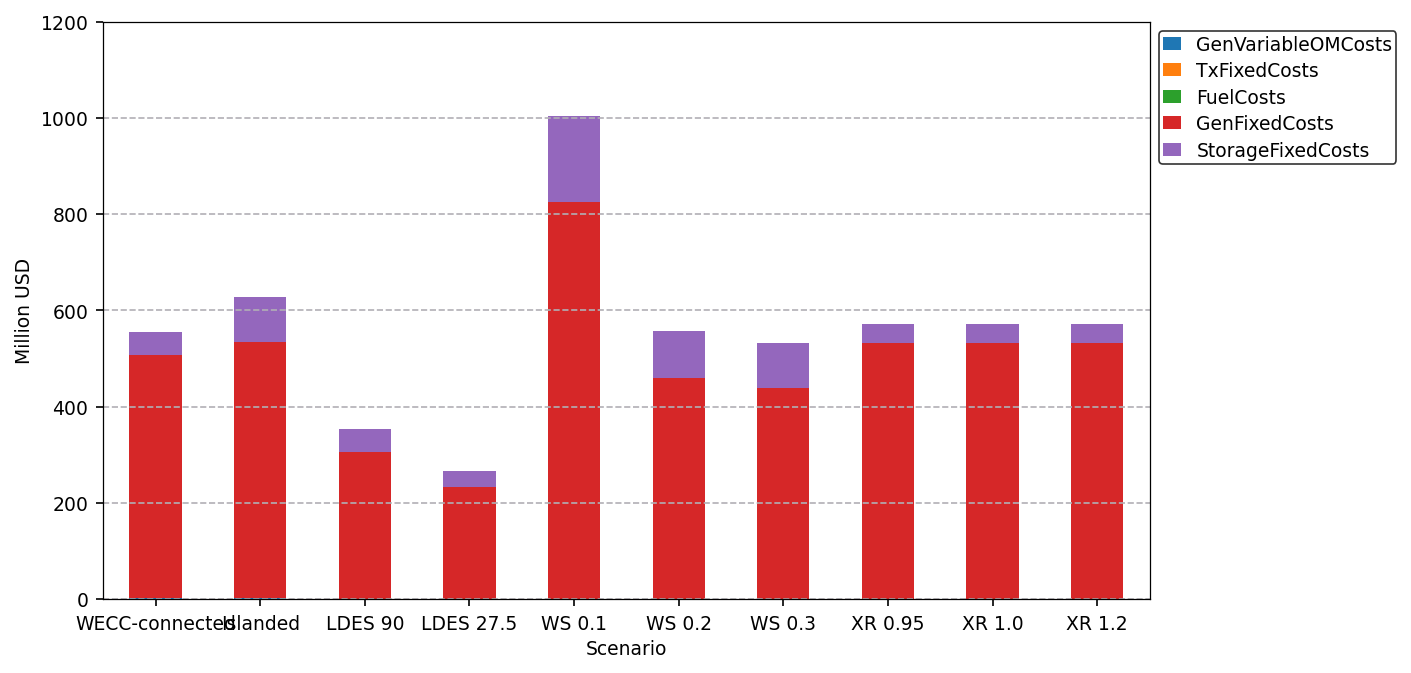

In [25]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,5), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = total_real_costs[cost_types].plot.bar(stacked=True,ax=ax, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Million USD", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Real costs (Million USD) in PNM.png", transparent=False)

#Rename for spaces purposes
#data=costsNPV_by_scenario.rename(index=figure_names,inplace=False)
total_real_costs.T.to_latex(folder_to_save_results+"Real costs (Million USD) in PNM.tex",index=True,
                                  float_format='%.1f',
                                  caption="Real costs (Million USD) in PNM")



In [26]:
fname="loads.csv"
loads = get_data_sftp(hostname, username, scenario_name, fname, fpath='inputs')
loads.columns= loads.columns.str.lower()
loads=loads.loc[loads.load_zone.isin(['NM_N'])]
loads=loads.replace({"scenario": figure_names})
loads

,load_zone,timepoint,zone_demand_mw,scenario
69888,NM_N,219168,"1,596.86",WECC-connected
69889,NM_N,219172,"1,615.79",WECC-connected
69890,NM_N,219176,"1,324.08",WECC-connected
69891,NM_N,219180,"1,338.63",WECC-connected
69892,NM_N,219184,"1,475.81",WECC-connected
...,...,...,...,...
72067,NM_N,227884,"1,412.81",XR 1.2
72068,NM_N,227888,"1,124.93",XR 1.2
72069,NM_N,227892,"1,126.09",XR 1.2
72070,NM_N,227896,"1,306.82",XR 1.2


In [27]:
loads_by_scenario= loads .pivot_table(
    index="scenario", values="zone_demand_mw", aggfunc=np.sum )
loads_by_scenario=loads_by_scenario*4.016   
loads_by_scenario

,zone_demand_mw
scenario,
Islanded,"12,356,391.06"
LDES 27.5,"12,356,391.06"
LDES 90,"12,356,391.06"
WECC-connected,"12,356,391.06"
WS 0.1,"12,356,391.06"
WS 0.2,"12,356,391.06"
WS 0.3,"12,356,391.06"
XR 0.95,"12,356,391.06"
XR 1.0,"12,356,391.06"


In [28]:
total_real_costs_w_load=pd.merge(left=total_real_costs,right=loads_by_scenario, on=['scenario'])
total_real_costs_w_load['USD/MWh']=total_real_costs_w_load['Total']*10**6/total_real_costs_w_load['zone_demand_mw']
total_real_costs_w_load['USD/MWh (*)']=total_real_costs_w_load['Total (*)']*10**6/total_real_costs_w_load['zone_demand_mw']
total_real_costs_w_load.drop(['zone_demand_mw'], axis=1, inplace=True)

#rename the columns
total_real_costs_w_load.rename({'GenVariableOMCosts': 'Gen. O&M costs'}, axis=1, inplace=True)
total_real_costs_w_load.rename({'TxFixedCosts': 'Trans. fixed costs'}, axis=1, inplace=True)
total_real_costs_w_load.rename({'FuelCosts': 'Fuel costs'}, axis=1, inplace=True)
total_real_costs_w_load.rename({'GenFixedCosts': 'Gen. fixed costs'}, axis=1, inplace=True)
total_real_costs_w_load.rename({'StorageFixedCosts': 'Storage power capacity costs'}, axis=1, inplace=True)
total_real_costs_w_load.rename({'EnergyStorageFixedCosts': 'Storage energy capacity costs'}, axis=1, inplace=True)
total_real_costs_w_load.rename({'purchase': 'Energy import costs'}, axis=1, inplace=True)
total_real_costs_w_load.rename({'sale': 'Energy export revenue'}, axis=1, inplace=True)
total_real_costs_w_load.rename({'net revenue': 'Net energy exchange revenue'}, axis=1, inplace=True)


#sort the columns

total_real_costs_w_load=total_real_costs_w_load[['Gen. fixed costs', 
                                                 'Gen. O&M costs', 
                                                 'Fuel costs', 
                                                 'Trans. fixed costs',
                                                 'Storage power capacity costs',
                                                 'Storage energy capacity costs',
                                                 'Energy import costs',
                                                 'Energy export revenue',
                                                 'Net energy exchange revenue',
                                                 'Total',
                                                 'Total (*)',
                                                 'USD/MWh',
                                                 'USD/MWh (*)'

]]

total_real_costs_w_load

,Gen. fixed costs,Gen. O&M costs,Fuel costs,Trans. fixed costs,Storage power capacity costs,Storage energy capacity costs,Energy import costs,Energy export revenue,Net energy exchange revenue,Total,Total (*),USD/MWh,USD/MWh (*)
scenario,,,,,,,,,,,,,
WECC-connected,504.19,2.56,0.00,0.00,49.41,991.63,"89,218.01","78,861.75","-10,356.25","1,547.79","11,904.04",125.26,963.39
Islanded,531.54,2.56,0.00,0.00,94.61,"2,086.43",0.00,0.00,0.00,"2,715.13","2,715.13",219.74,219.74
LDES 90,304.64,1.33,0.00,0.00,47.66,547.26,"131,497.15","16,429.66","-115,067.49",900.89,"115,968.38",72.91,"9,385.30"
LDES 27.5,231.64,1.33,0.00,0.00,33.22,116.57,"137,858.24","12,530.78","-125,327.46",382.76,"125,710.22",30.98,"10,173.70"
WS 0.1,824.64,1.33,0.00,0.00,177.00,"4,017.60","13,382.78","116,220.84","102,838.06","5,020.56","-97,817.50",406.31,"-7,916.35"
WS 0.2,457.60,1.33,0.00,0.00,98.61,"2,143.84","57,248.47","26,790.73","-30,457.73","2,701.38","33,159.11",218.62,"2,683.56"
WS 0.3,438.46,1.33,0.00,0.00,92.18,"1,982.14","65,979.07","24,519.99","-41,459.08","2,514.11","43,973.19",203.47,"3,558.74"
XR 0.95,531.51,1.33,0.00,0.00,39.97,802.29,"126,164.36","64,979.94","-61,184.42","1,375.10","62,559.52",111.29,"5,062.93"
XR 1.0,531.51,1.33,0.00,0.00,39.97,802.29,"126,723.52","65,040.21","-61,683.31","1,375.10","63,058.41",111.29,"5,103.30"


In [31]:
total_real_costs_w_load.T.to_latex(folder_to_save_results+"Real costs (Million USD) in PNM with price.tex",index=True,
                                  float_format='%.1f',
                                  caption="Real costs (Million USD) in PNM")

/tmp/ipykernel_4191532/1752242190.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  total_real_costs_w_load.T.to_latex(folder_to_save_results+"Real costs (Million USD) in PNM with price.tex",index=True,
